In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp
import math
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("./class")
from Flow_class import Flow

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:241: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim3d(z)


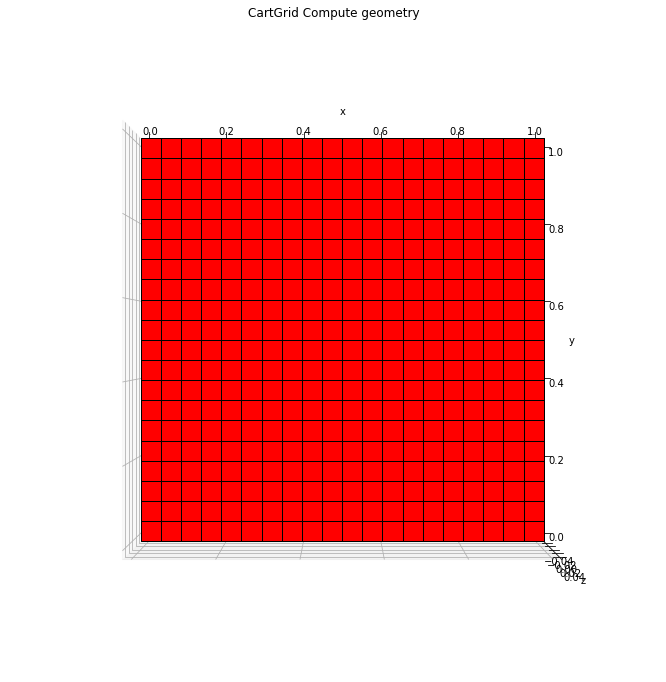

In [3]:
Nx=20
Ny=20
Lx=1.0
Ly=1.0
hx=Lx/Nx
hy=Ly/Ny
phys_dims=[Lx,Ly]
g=pp.CartGrid([Nx,Ny],phys_dims)
g.compute_geometry()
pp.plot_grid(g,figsize=(15,12))

In [4]:
# Permeability
perm = pp.SecondOrderTensor(np.ones(g.num_cells))                     
#f_lambda= lambda x,y,z: math.sin(4*math.pi*x)
f_lambda=lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y)

bc_lambda=lambda x,y,z:math.sin(math.pi*x)*math.sin(math.pi*y)

# Collect all parameters in a dictionary
parameters = {"second_order_tensor": perm, "f_lambda": f_lambda, "bc_lambda": bc_lambda}

In [5]:
flow=Flow(g,parameters,"Tpfa")
flow.set_bc()
flow.set_source()
#f=g.cell_volumes
#flow.data[pp.PARAMETERS]["flow"]["source"]=f
#print(flow.data[pp.PARAMETERS]["flow"])
p=flow.solve()
print(p.size)

Tpfa
400


In [6]:
#print(flow.data)

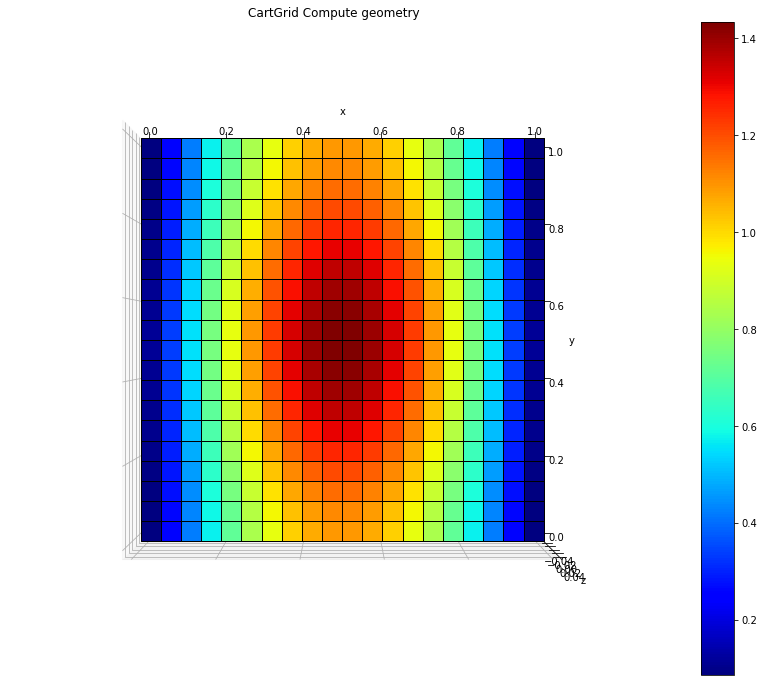

In [7]:
pp.plot_grid(g, p, figsize=(15, 12))



In [8]:
flux=flow.get_flux(p)

In [9]:
#flow_discretization = pp.MVEM("flow")

In [10]:
#P0u = flow_discretization.project_flux(g,flux,flow.data)

In [11]:
#pp.plot_grid(g, p, P0u * 0.2, figsize=(15, 12))

In [12]:
#flow.plot_pressure_flux(flux,p)